In [1]:
# Import libraries
import sqlite3

import pandas as pd
import matplotlib.pyplot as plt
import db_queries
#print(db_queries.get_ref_id('Mario Yamasaki'))

# connect to database
import os
# get filepath to database
parent_dir = os.path.dirname(os.getcwd())
db_filepath = parent_dir + r'\ufc_db.db'
# connect to database (not needed for now)
db_connection = sqlite3.connect(db_filepath)
cursor = db_connection.cursor()


In [2]:
# get all all fight id, date, finish method
query = "SELECT events.date, fights.id, fights.win_method FROM events JOIN fights ON events.id = fights.event_id;"
list_of_fights = cursor.execute(query).fetchall()

#print(list_of_fights)
# [('23/Feb/2001', 1, 'Submission'), 

In [ ]:
# get all years then make a dictionary 
years_data = dict()
for fight in list_of_fights:
  # get year of fight
  year = fight[0].split('/')[2]
  if year not in years_data.keys():
    # make a dictionary
    years_data[int(year)] = {'total fights': 0, 'finish': 0, 'TKO_KO': 0, 'submission': 0, 'decision': 0}
    
#for key, item in years_data.items():
#  print(f'{key} : {item}')

#### All win methods
Submission
Decision - Unanimous
Overturned
KO/TKO
DQ
Decision - Majority
TKO - Doctor'sStoppage
Decision - Split
CouldNotContinue
Other

In [5]:
# Count all finishes and add to year
for fight in list_of_fights:
  # get year of fight
  year = int(fight[0].split('/')[2])
  
  # +1 to total fights
  years_data[year]['total fights'] += 1
  
  # check finish method
  if (fight[2] in ['KO/TKO',"TKO - Doctor'sStoppage"]):
    years_data[year]['TKO_KO'] += 1
    years_data[year]['finish'] += 1
    
  elif (fight[2] == 'Submission'):
    years_data[year]['submission'] += 1
    years_data[year]['finish'] += 1
  
  elif ('Decision' in fight[2]):
    years_data[year]['decision'] += 1

In [ ]:
# check print
for key, item in years_data.items():
  print(f'{key} : {item}')

In [7]:
# set x axis
x_axis_years = [x for x in years_data.keys()]
x_axis_years.sort()

In [8]:
# set y axis --> number of fights
y_axis = []
for year in x_axis_years:
  y_axis.append(years_data[year]['total fights'])
  
chart_title = 'num fights by year'
y_axis_label = 'num of fights'

In [9]:
# set y axis --> finsh % (of total fights)
y_axis = []
for year in x_axis_years:
  percent_finish = round((years_data[year]['finish'] / years_data[year]['total fights']) * 100)
  y_axis.append(percent_finish)
  
chart_title = 'percent finishes by year'
y_axis_label = 'percent'

In [10]:
# set y axis --> Decision % (of total fights)
y_axis = []
for year in x_axis_years:
  percent_finish = round((years_data[year]['decision'] / years_data[year]['total fights']) * 100)
  y_axis.append(percent_finish)
  
chart_title = 'Percent decisions by year'
y_axis_label = 'Percent'

In [11]:
# set y axis --> KO/TKOs % (of total fights)    (2 LINE PLOTS)
y_axis = []
for year in x_axis_years:
  percent_finish = round((years_data[year]['TKO_KO'] / years_data[year]['total fights']) * 100)
  y_axis.append(percent_finish)
  
  
# set y axis 2 --> KO/TKOs % (of finishes)
y_axis2 = []
for year in x_axis_years:
  percent_finish = round((years_data[year]['TKO_KO'] / years_data[year]['finish']) * 100)
  y_axis2.append(percent_finish)
  

chart_title = 'Percent KO/TKOs by year'
y_axis_label = 'Percent'

y1_label = 'Percent of total fights'
y2_label = 'Percent of finishes'

In [12]:
# set y axis --> Submissions % (of total fights)    (2 LINE PLOTS)
y_axis = []
for year in x_axis_years:
  percent_finish = round((years_data[year]['submission'] / years_data[year]['total fights']) * 100)
  y_axis.append(percent_finish)
  
# set y axis 2 --> KO/TKOs % (of finishes)
y_axis2 = []
for year in x_axis_years:
  percent_finish = round((years_data[year]['submission'] / years_data[year]['finish']) * 100)
  y_axis2.append(percent_finish)
  
chart_title = 'Percent submissions by year'
y_axis_label = 'Percent'

y1_label = 'Percent of total fights'
y2_label = 'Percent of finishes'

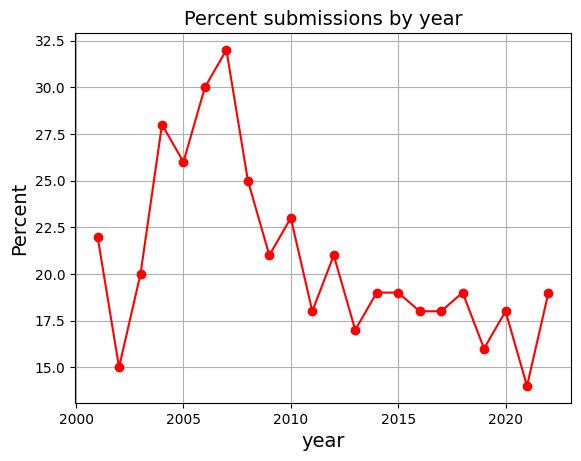

In [13]:
# SINGLE LINE PLOT
plt.plot(x_axis_years, y_axis, color='red', marker='o', label = 'line1')
plt.title(chart_title, fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel(y_axis_label, fontsize=14)
plt.grid(True)
plt.show()

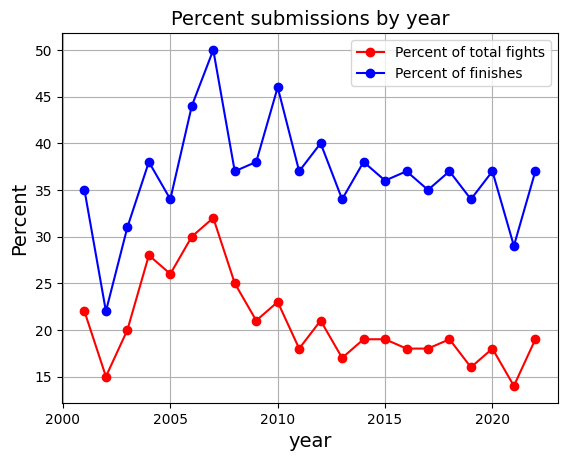

In [14]:
# MULTIPLE LINE PLOT
plt.plot(x_axis_years, y_axis, color='red', marker='o', label = y1_label)
plt.plot(x_axis_years, y_axis2, color='blue', marker='o', label = y2_label)

plt.title(chart_title, fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel(y_axis_label, fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
